# GoGoD Statistics

## Scanning the Folders

In [1]:
import os

path = r'C:\Users\Pichau\Desktop\GoGoD\Database'
os.chdir(path)

game_folders = os.listdir()

#### Reading the Folders

In [2]:
dict_folders = {}
for folder in game_folders:
    
    new_path = path + '\\' + folder
    games_list = os.listdir(new_path)
    
    dict_folders[folder] = games_list

#### For the last folder

In [3]:
non_standard = 'Non19x19Boards'
for folder in dict_folders[non_standard]:
    
    new_path = path + '\\' + non_standard + '\\' + folder
    games_list = os.listdir(new_path)
    
    dict_folders[non_standard + '\\' + folder] = games_list

#### Deleting the useless folder

In [4]:
dict_folders.pop(non_standard)

['13x13 Games', '15x15 Games', '21x21 Games', '9x9 Games', 'Tibet_Games']

## Scanning All Files

In [5]:
import time

In [6]:
games_info = {}
for folder in dict_folders.keys():
    tic = time.time()
    for file in dict_folders[folder]:
        
        new_path = path + '\\' + folder + '\\' + file
        # Opening the Game
        with open(new_path, 'rt') as f:
            
            game_content = []
            for row in f:
                game_content.append(row)
            
        games_info[folder + '\\' + file] = game_content
    
    tac = time.time()
    print('Folder:', folder, 'Time:', (tac - tic))

Folder: 0196-1699 Time: 3.722738265991211
Folder: 1700-99 Time: 4.885223150253296
Folder: 1800-49 Time: 4.476611375808716
Folder: 1850-99 Time: 4.43263578414917
Folder: 1900-09 Time: 1.553532600402832
Folder: 1910-19 Time: 1.7170162200927734
Folder: 1920-29 Time: 3.5928287506103516
Folder: 1930-39 Time: 7.2506632804870605
Folder: 1940-49 Time: 2.804868459701538
Folder: 1950-59 Time: 5.681921482086182
Folder: 1960-69 Time: 9.786868810653687
Folder: 1970-75 Time: 6.5173163414001465
Folder: 1976-79 Time: 6.394668102264404
Folder: 1980 Time: 2.6142146587371826
Folder: 1981 Time: 2.058145761489868
Folder: 1982 Time: 1.8664367198944092
Folder: 1983 Time: 2.3697664737701416
Folder: 1984 Time: 1.9681000709533691
Folder: 1985 Time: 2.889252185821533
Folder: 1986 Time: 2.582179546356201
Folder: 1987 Time: 2.4445881843566895
Folder: 1988 Time: 3.117626667022705
Folder: 1989 Time: 3.777381181716919
Folder: 1990 Time: 6.803200006484985
Folder: 1991 Time: 3.909770965576172
Folder: 1992 Time: 4.09411

## Reformatting the Info

In [7]:
import re

In [8]:
counter = 0
games = {}
for key in games_info.keys():

    game_allinone = ' '.join(games_info[key])
    
    try:
        white = re.search('(?<=PW\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        white = 'NULL'
    try:    
        white_rank = re.search('(?<=WR\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        white_rank = 'NULL'
    try:
        black = re.search('(?<=PB\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        black = 'NULL'
    try:
        black_rank = re.search('(?<=BR\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        black_rank = 'NULL'
    try:
        event = re.search('(?<=EV\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        event = 'NULL'
    try:
        date = re.search('(?<=DT\[)([^]]+)(?=\])', game_allinone).group(1)
        date = re.search('\d{4}-\d{2}-\d{2}', date).group()
    except:
        date = 'NULL'
    try:
        komi = re.search('(?<=KM\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        komi = 'NULL'
    try:
        result = re.search('(?<=RE\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        result = 'NULL'
    try:
        place = re.search('(?<=PC\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        place = 'NULL'
    try:
        round_comp = re.search('(?<=RO\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        round_comp = 'NULL'
    try:
        time_game = re.search('(?<=TM\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        time_game = 'NULL'
    try:
        rules = re.search('(?<=RU\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        rules = 'NULL'
    try:
        size = re.search('(?<=SZ\[)([^]]+)(?=\])', game_allinone).group(1)
    except:
        size = 'NULL'
        
    moves = game_allinone.replace('\n', ' ')
    try:
        game = re.search('(?<=US\[GoGoD95\])(.+)(?=\))', moves).group(1)
        game = re.findall('(?<=;)([^;]+)(?=;)', game)
    except:
        game = 'NULL'

    game_info_final = [white, white_rank, black, black_rank, 
                       event, date, komi, result,
                       place, round_comp, time_game, rules,
                       size, game, key]

    games[key] = game_info_final
    
    if counter % 1000 == 0:
        print(f'{(counter/len(games_info))*100} %')
    
    counter += 1

0.0 %
1.0330578512396695 %
2.066115702479339 %
3.0991735537190084 %
4.132231404958678 %
5.1652892561983474 %
6.198347107438017 %
7.231404958677685 %
8.264462809917356 %
9.297520661157025 %
10.330578512396695 %
11.363636363636363 %
12.396694214876034 %
13.429752066115702 %
14.46280991735537 %
15.495867768595042 %
16.528925619834713 %
17.56198347107438 %
18.59504132231405 %
19.62809917355372 %
20.66115702479339 %
21.694214876033058 %
22.727272727272727 %
23.7603305785124 %
24.793388429752067 %
25.826446280991732 %
26.859504132231404 %
27.892561983471076 %
28.92561983471074 %
29.958677685950413 %
30.991735537190085 %
32.02479338842975 %
33.057851239669425 %
34.090909090909086 %
35.12396694214876 %
36.15702479338843 %
37.1900826446281 %
38.22314049586777 %
39.25619834710744 %
40.289256198347104 %
41.32231404958678 %
42.35537190082644 %
43.388429752066116 %
44.421487603305785 %
45.45454545454545 %
46.48760330578512 %
47.5206611570248 %
48.553719008264466 %
49.586776859504134 %
50.6198347107

## Creating the DataFrames

In [10]:
import pandas as pd
import numpy as np

In [11]:
# Converting the games dictionary into a list
games_list_v2 = [games[key] for key in games.keys()]

df_games = pd.DataFrame(data = games_list_v2,
                        columns = ['White', 'White Rank', 'Black', 'Black Rank',
                                   'Event', 'Date', 'Komi', 'Result',
                                   'Place', 'Round', 'Time', 'Rules',
                                   'Board Size', 'Moves', 'File Address'])

df_games_pd = df_games.replace('NULL', np.nan)

In [12]:
df_games_pd.head()

,White,White Rank,Black,Black Rank,Event,Date,Komi,Result,Place,Round,Time,Rules,Board Size,Moves,File Address
0,Sun Ce,NaN,Lu: Fan,NaN,NaN,NaN,NaN,? (No further moves known),"Wu Kingdom, China",NaN,NaN,Old Chinese,19,"[W[cn], B[gq], W[en], B[ci], W[ck], B[cf], W[c...",0196-1699\0196-00-00.sgf
1,Wang Wuzi,NaN,Jin Wu Di,NaN,Emperor Jin Wu Di summons Wang Wuzi to play go,NaN,0,Left unfinished,NaN,NaN,NaN,NaN,19,"[W[cn], B[gq], W[iq], B[cl], W[cj], B[dm], W[c...",0196-1699\0280-00-00.sgf
2,Zheng Guanyin,NaN,Emperor Xuan Zong,NaN,Ming Huang summons Zheng Guanyin to play go,NaN,0,Left unfinished,NaN,NaN,NaN,NaN,19,"[W[qf], B[mc], W[kc], B[qk], W[qi], B[qn], W[m...",0196-1699\0750.sgf
3,An Immortal,NaN,Another Immortal,NaN,The Rotted Axe-handle Game,NaN,0,B+1,NaN,NaN,NaN,Group tax?,19,"[W[fc], B[fe], W[ic], B[eb], W[fb], B[ie], W[e...",0196-1699\0800+.sgf
4,Li Baixiang,NaN,Anon.,NaN,Li Baixiang gives 3 stones,NaN,NaN,?,NaN,NaN,NaN,NaN,19,"[W[fc], B[cg], W[ci], B[fe], W[ic], B[lc], W[i...",0196-1699\1100+.sgf


#### Reformatting the Moves

In [13]:
moves_pd = df_games_pd['Moves'].values
len_moves = []
for i in range(0, len(moves_pd)):
    
    if type(moves_pd[i]) == list:
        len_moves.append(len(moves_pd[i]))
    else:
        len_moves.append(np.nan)
        
df_games_pd['Length of Game'] = len_moves

In [14]:
df_games_pd.head()

,White,White Rank,Black,Black Rank,Event,Date,Komi,Result,Place,Round,Time,Rules,Board Size,Moves,File Address,Length of Game
0,Sun Ce,NaN,Lu: Fan,NaN,NaN,NaN,NaN,? (No further moves known),"Wu Kingdom, China",NaN,NaN,Old Chinese,19,"[W[cn], B[gq], W[en], B[ci], W[ck], B[cf], W[c...",0196-1699\0196-00-00.sgf,42.0
1,Wang Wuzi,NaN,Jin Wu Di,NaN,Emperor Jin Wu Di summons Wang Wuzi to play go,NaN,0,Left unfinished,NaN,NaN,NaN,NaN,19,"[W[cn], B[gq], W[iq], B[cl], W[cj], B[dm], W[c...",0196-1699\0280-00-00.sgf,82.0
2,Zheng Guanyin,NaN,Emperor Xuan Zong,NaN,Ming Huang summons Zheng Guanyin to play go,NaN,0,Left unfinished,NaN,NaN,NaN,NaN,19,"[W[qf], B[mc], W[kc], B[qk], W[qi], B[qn], W[m...",0196-1699\0750.sgf,76.0
3,An Immortal,NaN,Another Immortal,NaN,The Rotted Axe-handle Game,NaN,0,B+1,NaN,NaN,NaN,Group tax?,19,"[W[fc], B[fe], W[ic], B[eb], W[fb], B[ie], W[e...",0196-1699\0800+.sgf,289.0
4,Li Baixiang,NaN,Anon.,NaN,Li Baixiang gives 3 stones,NaN,NaN,?,NaN,NaN,NaN,NaN,19,"[W[fc], B[cg], W[ci], B[fe], W[ic], B[lc], W[i...",0196-1699\1100+.sgf,60.0


### Finally Saving the Data

In [15]:
path = r'C:\Users\Pichau\Google Drive\ML\SQL'
os.chdir(path)

df_games_pd.to_csv('GoGoD-Scanned.csv')

#### Mean Length of Games

In [16]:
mean_len = df_games_pd['Length of Game'].mean()

In [17]:
mean_len

206.94611641924206

#### All Players and How Many Games They've Played

In [18]:
all_players = pd.concat([df_games_pd['Black'], df_games_pd['White']])
all_players = pd.DataFrame(all_players)
all_players.columns = ['Player']

players = all_players.groupby('Player').size().reset_index(name = 'Counts')
players = players.sort_values(by = 'Counts', ascending = False)

In [19]:
players.head()

,Player,Counts
694,Cho Chikun,2142
707,Cho Hun-hyeon,2023
8006,Yi Ch'ang-ho,1917
5661,Rin Kaiho,1705
1493,Hashimoto Utaro,1552


## Players' Ranks

#### For more recent players

In [160]:
games_back = -20000

player_black = df_games_pd[['Black', 'Black Rank']].iloc[games_back:]
player_black.columns = ['Player', 'Rank']
player_black.index = player_black['Player']
player_white = df_games_pd[['White', 'White Rank']].iloc[games_back:]
player_white.columns = ['Player', 'Rank']
player_white.index = player_white['Player']

In [161]:
x = pd.concat([player_black, player_white], axis = 0)

In [162]:
x.shape

(40000, 2)

In [163]:
rank_list = []
for rank_str in x['Rank']:
    try:
        rank = int(re.search('(\d{1})(?=d)', rank_str).group(1))
    except:
        rank = np.nan
        
    rank_list.append(rank)

rank_df = pd.DataFrame(rank_list, columns = ['Rank'])
rank_df['Player'] = x['Player'].values
rank_df = rank_df[['Player', 'Rank']]

ranking = rank_df.groupby('Player').agg('max')
ranking = ranking.sort_values(by = 'Rank', ascending = False)
ranking_no_nan = ranking.dropna()

In [164]:
ranking.shape

(1988, 1)

In [114]:
ranking_no_nan.shape

(1215, 1)

In [115]:
ranking_pct = ranking_no_nan.groupby('Rank').size()/(ranking_no_nan.size)*100
ranking_pct = pd.DataFrame(ranking_pct, columns = ['%'])
ranking_pct

,%
Rank,
1.0,13.004115
2.0,10.699588
3.0,13.004115
4.0,9.053498
5.0,8.148148
6.0,8.641975
7.0,7.489712
8.0,5.267490
9.0,24.691358


Text(0.5,1,'Histogram of Number of Players x Rank for the last 20000 games\nTotal Number of Players with a Rank: 1215 (out of 1988)\n% of Players with a 9p Rank: 12.42%')

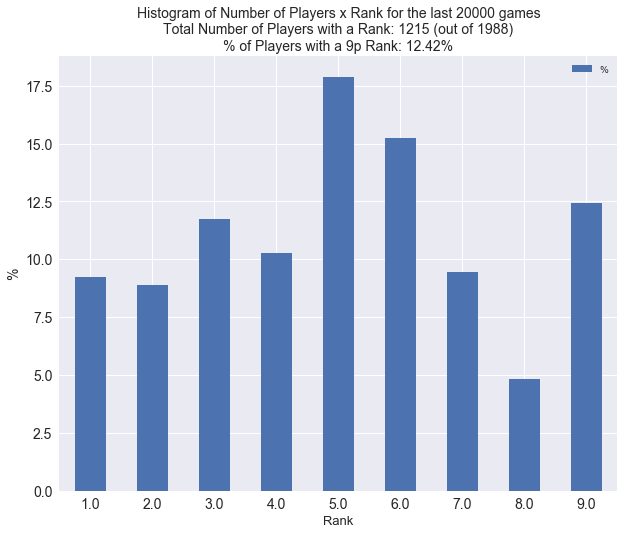

In [165]:
ax = ranking_pct.plot(kind = 'bar', label = 'Rank Histogram', figsize = (10, 8), rot = 0)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_xlabel('Rank', fontdict = {'fontsize': 13})
ax.set_ylabel('%', fontdict = {'fontsize': 14})
ax.set_title(f"""Histogram of Number of Players x Rank for the last {-games_back} games
Total Number of Players with a Rank: {ranking_no_nan.size} (out of {ranking.shape[0]})
% of Players with a 9p Rank: {round(float(ranking_pct.loc[9]), 2)}%""",
             fontdict = {'fontsize': 14},
             loc = 'center')

#### For all the players

In [117]:
player_black = df_games_pd[['Black', 'Black Rank']]
player_black.columns = ['Player', 'Rank']
player_black.index = player_black['Player']
player_white = df_games_pd[['White', 'White Rank']]
player_white.columns = ['Player', 'Rank']
player_white.index = player_white['Player']

In [118]:
x = pd.concat([player_black, player_white], axis = 0)

In [119]:
x.shape

(193600, 2)

In [120]:
rank_list = []
for rank_str in x['Rank']:
    try:
        rank = int(re.search('(\d{1})(?=d)', rank_str).group(1))
    except:
        rank = np.nan
        
    rank_list.append(rank)

rank_df = pd.DataFrame(rank_list, columns = ['Rank'])
rank_df['Player'] = x['Player'].values
rank_df = rank_df[['Player', 'Rank']]

ranking = rank_df.groupby('Player').agg('max')
ranking = ranking.sort_values(by = 'Rank', ascending = False)
ranking_no_nan = ranking.dropna()

In [140]:
ranking.shape

(8734, 1)

In [121]:
ranking_no_nan.shape

(4276, 1)

#### There are a total of 8734 players in the DB, with 4340 having ranks.

In [122]:
ranking_pct = ranking_no_nan.groupby('Rank').size()/(ranking_no_nan.size)*100
ranking_pct = pd.DataFrame(ranking_pct, columns = ['%'])
ranking_pct

,%
Rank,
1.0,9.237605
2.0,8.910196
3.0,11.739944
4.0,10.266604
5.0,17.890552
6.0,15.247895
7.0,9.448082
8.0,4.840973
9.0,12.418148


Text(0.5,1,'Histogram of Number of Players x Rank\nTotal Number of Players with a Rank: 4276 (out of 8734)\n% of Players with a 9p Rank: 12.42%')

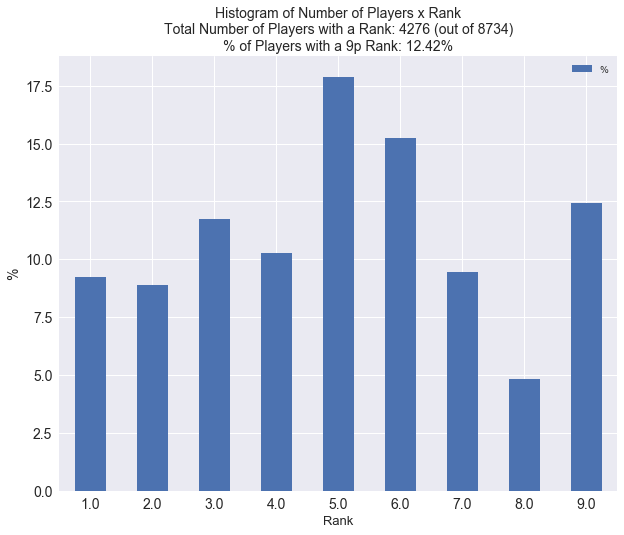

In [159]:
ax = ranking_pct.plot(kind = 'bar', label = 'Rank Histogram', figsize = (10, 8), rot = 0)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_xlabel('Rank', fontdict = {'fontsize': 13})
ax.set_ylabel('%', fontdict = {'fontsize': 14})
ax.set_title(f"""Histogram of Number of Players x Rank
Total Number of Players with a Rank: {ranking_no_nan.size} (out of {players.shape[0]})
% of Players with a 9p Rank: {round(float(ranking_pct.loc[9]), 2)}%""",
             fontdict = {'fontsize': 14},
             loc = 'center')

# How Many Times Black and White Won

In [25]:
# How many times Black and White won.
results = df_games_pd['Result']

results_list = []
for result_str in results:
    try:
        result = re.search('([BW])(?=\+)', result_str).group(1)
    except:
        result = np.nan
        
    results_list.append(result)

results_df = pd.DataFrame(results_list, columns = ['Result'])

winners = results_df.groupby('Result').size().reset_index(name = 'Counts')
winners = winners.sort_values(by = 'Counts', ascending = False)

winners['Counts'] = winners['Counts']/winners['Counts'].sum()

In [26]:
winners

,Result,Counts
0,B,0.515179
1,W,0.484821


#### In recent times

In [27]:
# How many times Black and White won in recent times.
winners_recent = results_df.iloc[-10000:].groupby('Result').size().reset_index(name = 'Counts')
winners_recent = winners_recent.sort_values(by = 'Counts', ascending = False)
winners_recent['Counts'] = winners_recent['Counts']/winners_recent['Counts'].sum()

In [28]:
winners_recent

,Result,Counts
1,W,0.513765
0,B,0.486235
